# Read matlab signals and expert annotation of FHRMA dataset


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/naomifridman/CTG_data/blob/main/FHRMAdataset_read_matlab_signal_and_anotation.ipynb)

In [20]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [53]:
def dec_to_min(l_idx):
    lm = [(start * 60, end * 60) for start, end in l_idx]
    return lm

In [54]:
def min_to_ind(l_min, frequency=4):
    lm = [(int(start * frequency), int(end * frequency)) for start, end in l_min]
    return lm

In [55]:
# Frequency of the signal in Hz
# frequency = 4  # 4Hz
def dec_to_ind(l_idx, frequency=4):
    print(l_idx)
    lm=dec_to_min(l_idx)
    li=min_to_ind(lm)

    return li

In [56]:
# Frequency of the signal in Hz
# frequency = 4  # 4Hz
def dec_to_ind_pt(l_idx, frequency=4):
    print(l_idx)
    lm= l_idx*60
    li=lm*frequency

    return li

In [21]:
!git clone https://github.com/utsb-fmm/FHRMA

fatal: destination path 'FHRMA' already exists and is not an empty directory.


In [22]:
os.listdir( 'FHRMA/FHRMAdataset/traindata/')[:4], len(os.listdir( 'FHRMA/FHRMAdataset/traindata/'))

(['train01.fhr', 'train02.fhr', 'train03.fhr', 'train04.fhr'], 66)

In [23]:
os.listdir( 'FHRMA/FHRMAdataset/testdata/')[:4], len(os.listdir( 'FHRMA/FHRMAdataset/testdata/'))

(['test01.fhr', 'test02.fhr', 'test03.fhr', 'test04.fhr'], 90)

# Read expert annotation file convert to df

# Read signals to csv

In [24]:

import os
import numpy as np
import struct



def binary_to_df(file_path):
    # Get the size of the file
    Lfile = os.path.getsize(file_path)

    # Read the binary file
    with open(file_path, "rb") as binary_file:
        data = binary_file.read()

    record_format = 'hhh'  # 2 floats and 1 byte
    record_size = struct.calcsize(record_format)
    #print(record_size, len(data), len(data) // record_size,len(data) / record_size)
    # Calculate the number of records
    num_records = len(data) // record_size

    # Unpack the data
    unpacked_data = [struct.unpack(record_format, data[i*record_size:(i+1)*record_size]) for i in range(num_records)]

    # Convert to a NumPy array
    np_array = np.array(unpacked_data)

    # Convert to a Pandas DataFrame
    df = pd.DataFrame(np_array, columns=['m', 'toco', 'fhr'])
    #print(df.head())
    #print(df.m.sum())
    df=df.iloc[1:][['toco', 'fhr']]
    df['fhr']=(df['fhr'])/4.
    df['toco']=(df['toco'])/2.
    return df


In [25]:
train_dir = 'FHRMA/FHRMAdataset/traindata/'
test_dir = 'FHRMA/FHRMAdataset/testdata/'
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

In [26]:
len(train_files),len(test_files)

(66, 90)

<Axes: title={'center': 'train01.fhr 4Hz'}>

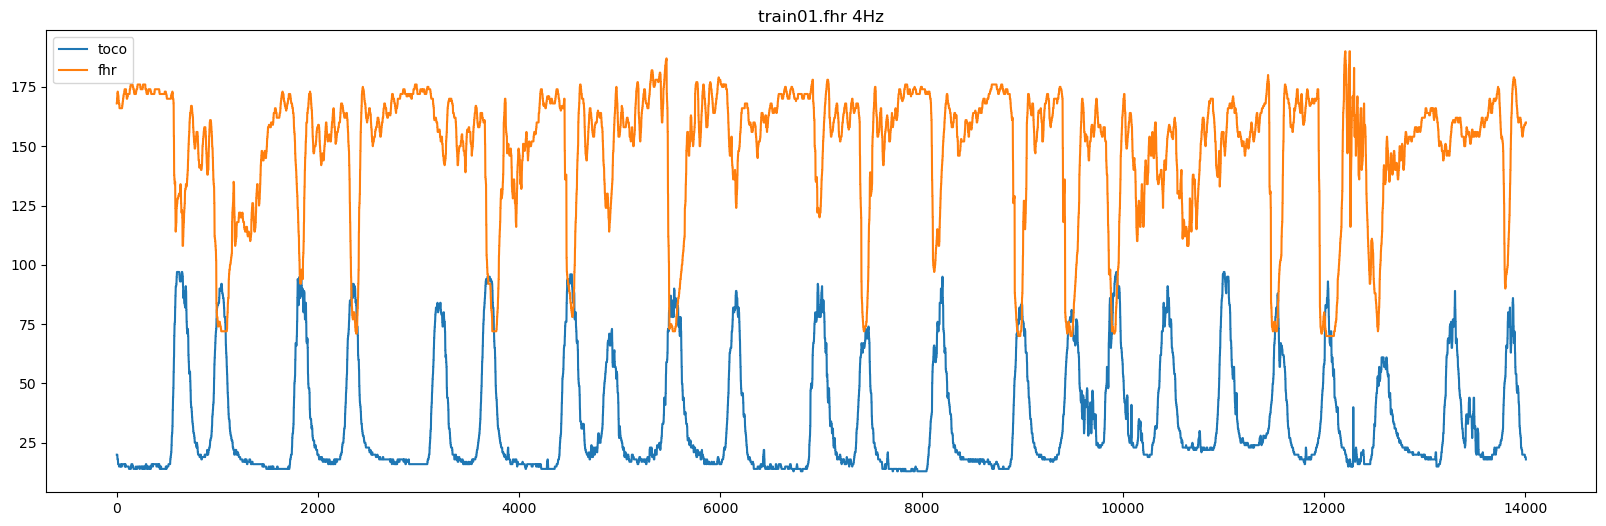

In [27]:
# Define the file path
file_path = os.path.join(train_dir, train_files[0])
df = binary_to_df(file_path)

df.plot(figsize=(20,6), title=train_files[0]+' 4Hz')

<Axes: title={'center': 'train11.fhr 4Hz'}>

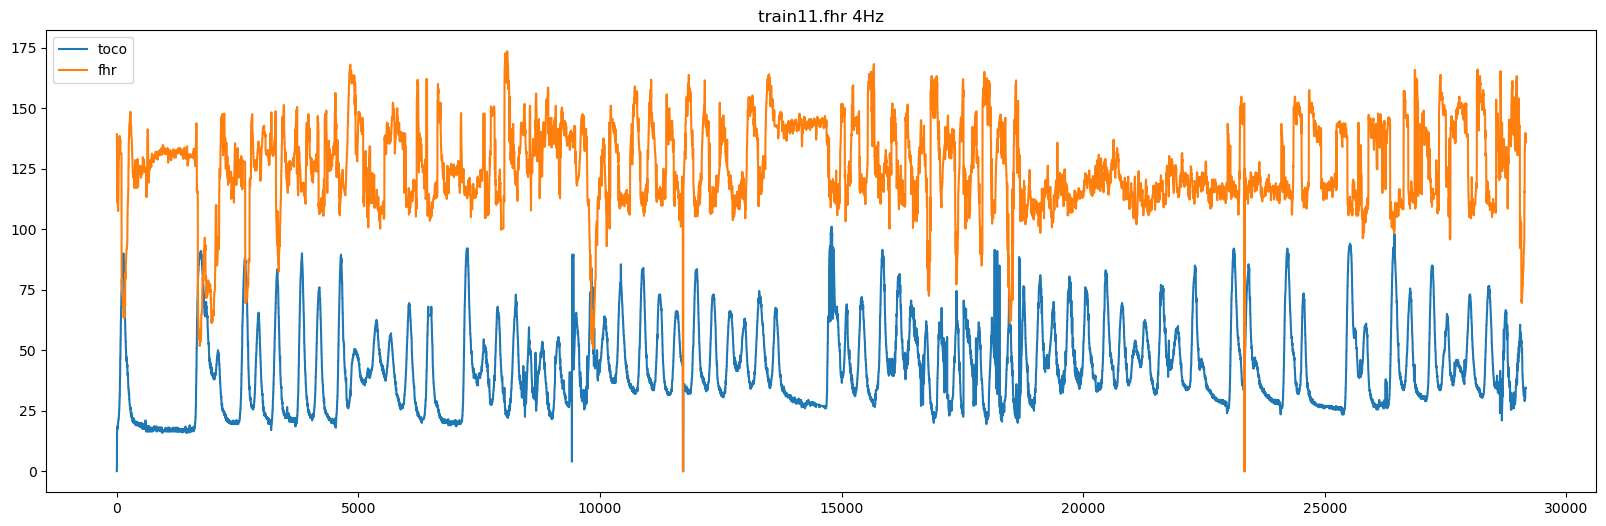

In [28]:
# Define the file path
file_path = os.path.join(train_dir, train_files[10])
df = binary_to_df(file_path)

df.plot(figsize=(20,6), title=train_files[10]+' 4Hz')

<Axes: title={'center': 'train21.fhr 4Hz'}>

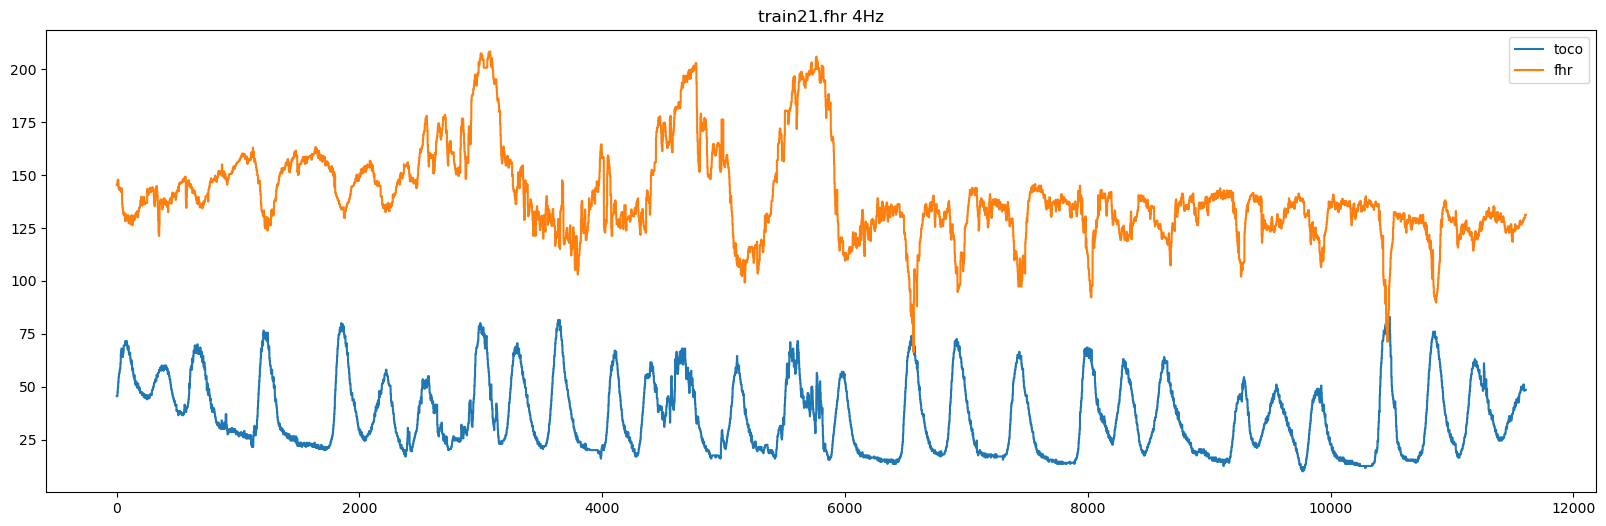

In [29]:
# Define the file path
file_path = os.path.join(train_dir, train_files[20])
df = binary_to_df(file_path)

df.plot(figsize=(20,6), title=train_files[20]+' 4Hz')

In [106]:
!mkdir train_csv

A subdirectory or file train_csv already exists.


In [31]:
!mkdir test_csv

In [107]:
!pwd

/c/Users/naomifr.WISMAIN/Downloads/FHR/Fetal_stress_prediction


# Read all fhr in the train and test directory and save to csv

In [32]:

file_info_list=[]
# train
for filename in os.listdir(train_dir):
        file_path = os.path.join(train_dir, filename)

        # Check if it's a file (not a directory)
        if os.path.isfile(file_path):
            # Convert binary file to dataframe
            df = binary_to_df(file_path)

            f=filename.split('.fhr')[0]+'.csv'
            df.to_csv(os.path.join('train_csv', f), index = False)

            # Append information to the list
            file_info_list.append({'pid':f,
                                   'test':0,
                                   'file_name': filename,
                                   'sig_length': len(df),
                                   'fhr_mean':df['fhr'].mean(),
                                   'toco_mean':df['toco'].mean()})

# train
for filename in os.listdir(test_dir):
        file_path = os.path.join(test_dir, filename)

        # Check if it's a file (not a directory)
        if os.path.isfile(file_path):
            # Convert binary file to dataframe
            df = binary_to_df(file_path)

            f=filename.split('.fhr')[0]+'.csv'
            df.to_csv(os.path.join('test_csv', f), index = False)

            # Append information to the list
            file_info_list.append({'pid':f,
                                   'test':1,
                                   'file_name': filename,
                                   'sig_length': len(df),
                                   'fhr_mean':df['fhr'].mean(),
                                   'toco_mean':df['toco'].mean()})


# Create a dynamic dataframe from the list of file information
dynamic_df = pd.DataFrame(file_info_list)
dynamic_df.to_csv('df_fhrma_dataset.csv', index = False)
# Display the dynamic dataframe
dynamic_df.head()


,pid,test,file_name,sig_length,fhr_mean,toco_mean
0,train01.csv,0,train01.fhr,14006,148.906112,33.752463
1,train02.csv,0,train02.fhr,16148,148.033936,17.714454
2,train03.csv,0,train03.fhr,9746,160.565360,34.688385
3,train04.csv,0,train04.fhr,17594,141.324145,39.549591
4,train05.csv,0,train05.fhr,17459,140.434919,33.603156


In [33]:
f

'test90.csv'

<Axes: >

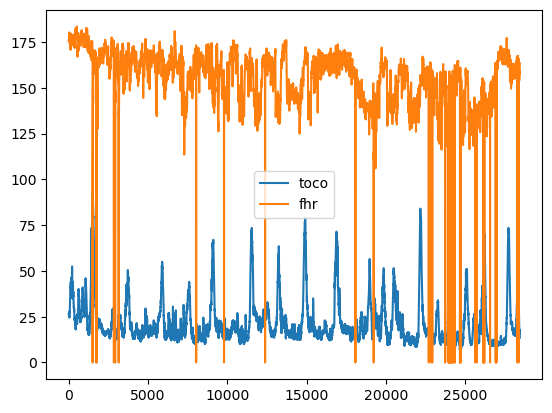

In [34]:
df.plot()

<Axes: title={'center': 'train03   4Hz'}>

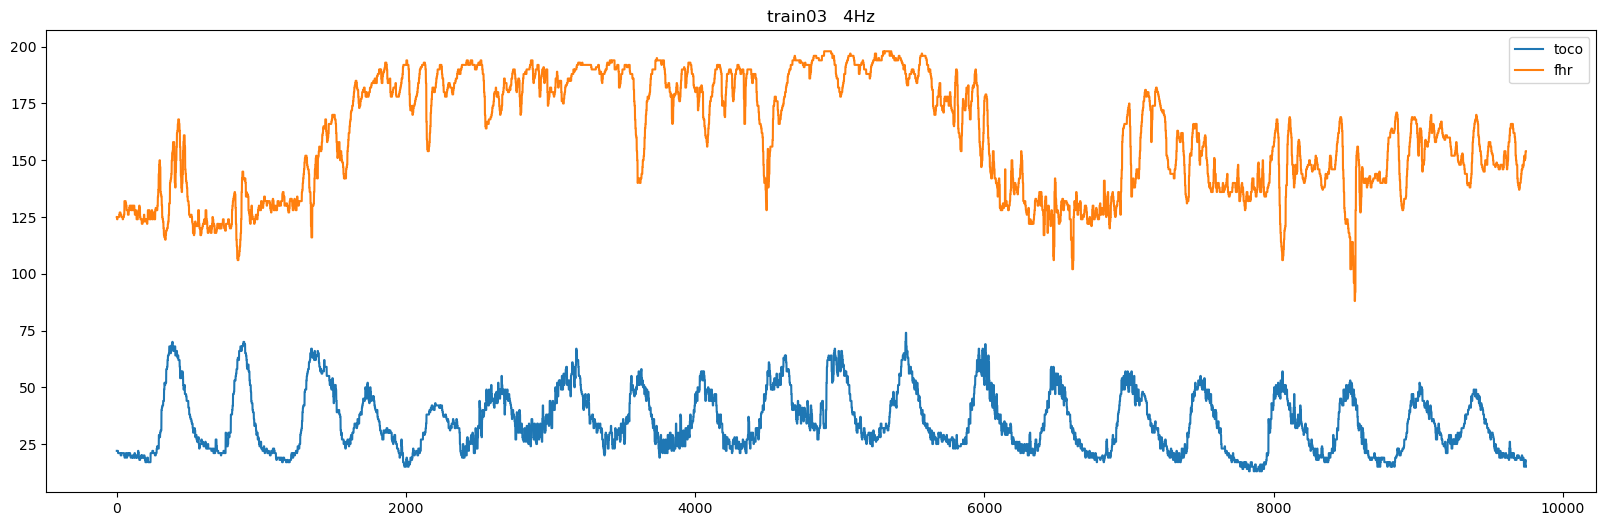

In [35]:
d=pd.read_csv('train_csv/train03.csv')
d.plot(figsize=(20,6), title='train03   4Hz')

## Signal files in test data are raw, no prerocessing

<Axes: title={'center': 'Raw  test83   4Hz'}>

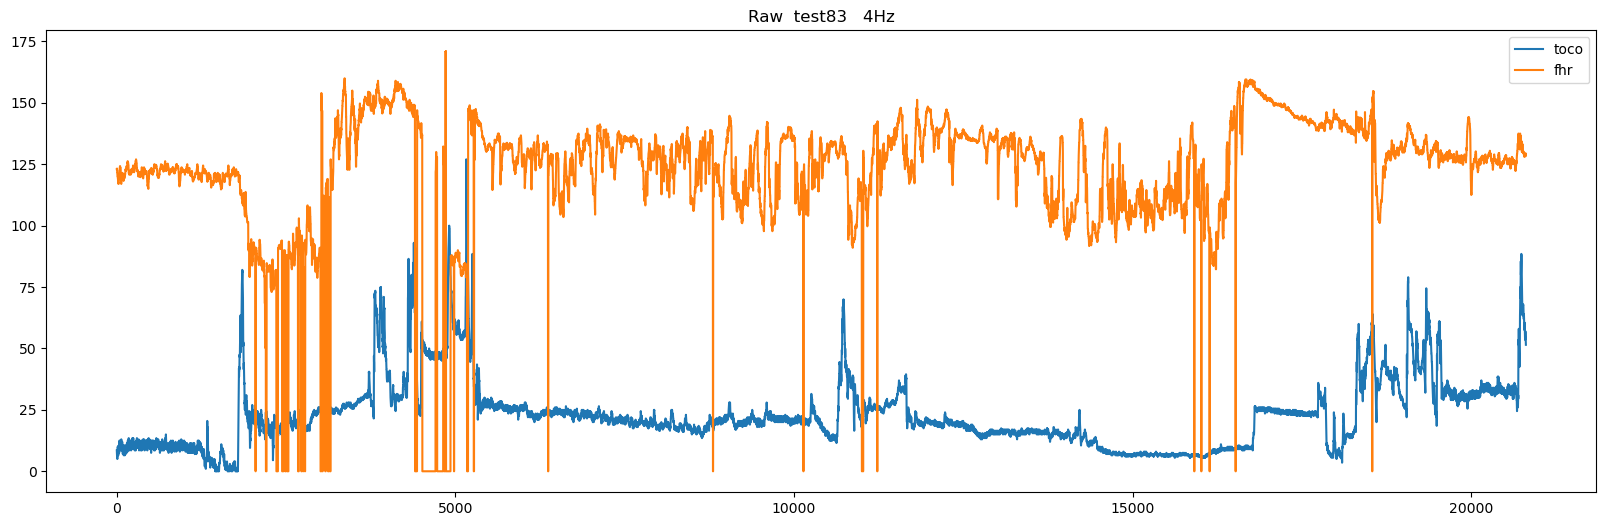

In [36]:
d=pd.read_csv('test_csv/test83.csv')
d.plot(figsize=(20,6), title='Raw  test83   4Hz')

<Axes: >

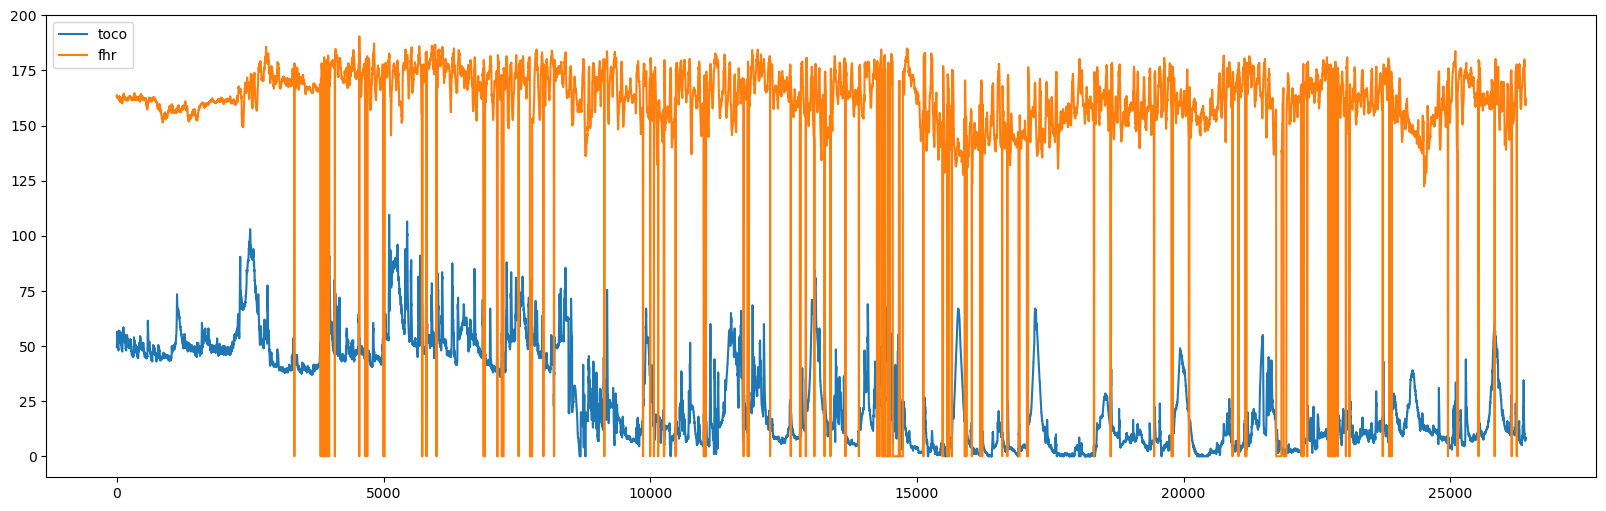

In [37]:
d=pd.read_csv('test_csv/test53.csv')
d.plot(figsize=(20,6))

In [38]:
dynamic_df.head()

,pid,test,file_name,sig_length,fhr_mean,toco_mean
0,train01.csv,0,train01.fhr,14006,148.906112,33.752463
1,train02.csv,0,train02.fhr,16148,148.033936,17.714454
2,train03.csv,0,train03.fhr,9746,160.565360,34.688385
3,train04.csv,0,train04.fhr,17594,141.324145,39.549591
4,train05.csv,0,train05.fhr,17459,140.434919,33.603156


<Axes: ylabel='Frequency'>

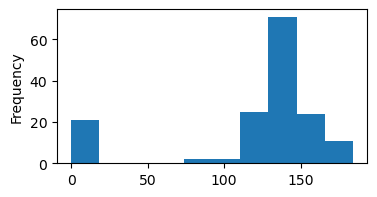

In [39]:
dynamic_df['fhr_mean'].plot(kind='hist', figsize=(4,2))

<Axes: ylabel='Frequency'>

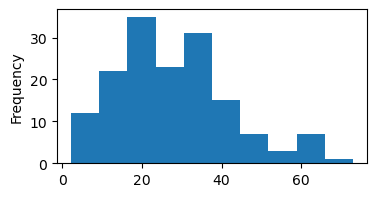

In [40]:
dynamic_df['toco_mean'].plot(kind='hist', figsize=(4,2))

In [41]:
dynamic_df[dynamic_df.fhr_mean<10]

,pid,test,file_name,sig_length,fhr_mean,toco_mean
38,train39.csv,0,train39.fhr,30515,8.736998,12.146567
39,train40.csv,0,train40.fhr,31423,0.000000,7.159406
45,train46.csv,0,train46.fhr,34811,5.815611,18.416765
56,train57.csv,0,train57.fhr,11641,0.000000,6.413281
68,test03.csv,1,test03.fhr,26250,0.000000,40.985962
75,test10.csv,1,test10.fhr,26532,0.000000,5.613806
77,test12.csv,1,test12.fhr,28752,7.574012,5.140582
86,test21.csv,1,test21.fhr,25794,0.000000,16.703982
92,test27.csv,1,test27.fhr,29448,0.000000,22.783347
93,test28.csv,1,test28.fhr,24370,0.000000,22.905519


<Axes: >

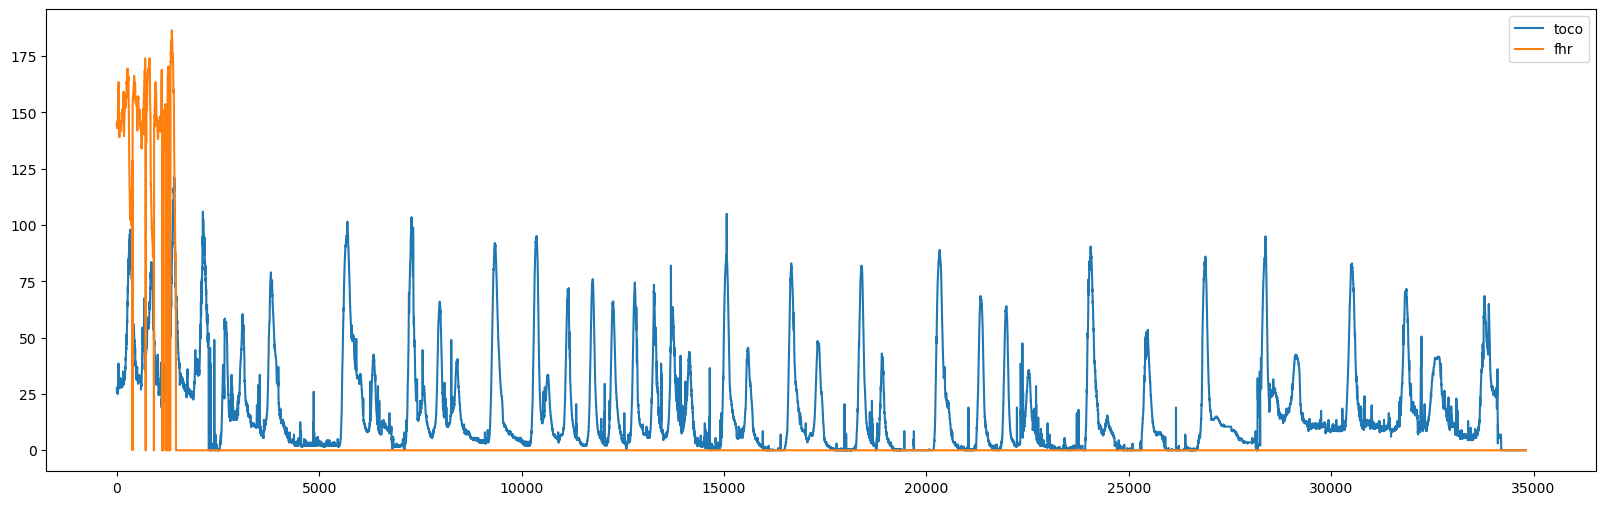

In [42]:
d=pd.read_csv('train_csv/train46.csv')
d.plot(figsize=(20,6))

In [43]:
d.describe()

,toco,fhr
count,34811.000000,34811.000000
mean,18.416765,5.815611
std,21.743468,28.913403
min,0.000000,0.000000
25%,3.000000,0.000000
50%,10.000000,0.000000
75%,26.500000,0.000000
max,121.500000,186.500000


In [44]:
dynamic_df.test.value_counts()

test
1    90
0    66
Name: count, dtype: int64

In [45]:
dynamic_df.to_csv('df_FHRMA_dataset.csv', index = False)

<Axes: ylabel='Frequency'>

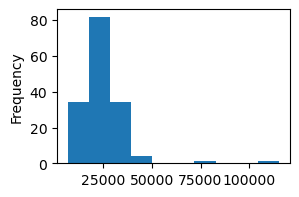

In [46]:
dynamic_df.sig_length.plot(kind='hist', figsize=(3,2))

<Axes: ylabel='Frequency'>

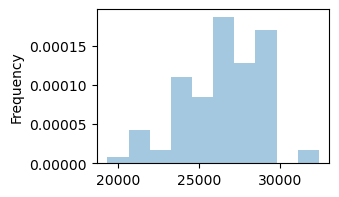

In [47]:
dynamic_df[dynamic_df.test==1].sig_length.plot(kind='hist', figsize=(3,2),alpha=0.4,density=True,label='test')


<Axes: ylabel='Frequency'>

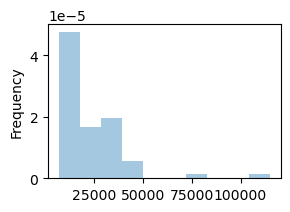

In [48]:
dynamic_df[dynamic_df.test==0].sig_length.plot(kind='hist', figsize=(3,2),density=True,alpha=0.4,label='train')

# Read Expert annotations

In [49]:
import scipy.io

# Load the .mat file
mat = scipy.io.loadmat('FHRMA/FHRMAdataset/analyses/expertAnalyses.mat')
m = mat['data']
m.shape
# Display the keys in the .mat file
print(mat.keys()),m.shape,len(m)

dict_keys(['__header__', '__version__', '__globals__', 'data'])


(None, (1, 156), 1)

## file info for example
0 (1,) - name
1 (2, 40) - the points from wich the base line was made
2 (1, 1) - ??
3 (1, 15546) - baseline
4 (6, 2) - acceleration
5 (10, 2) - deaccelerations
6 (0, 2) -
7 (0, 2)
8 (0, 2)

In [50]:
for j in range(9):
    print(j,m[0][0][j].shape)

0 (1,)
1 (2, 0)
2 (1, 1)
3 (0, 0)
4 (0, 2)
5 (0, 2)
6 (0, 2)
7 (0, 2)
8 (1, 2)


In [52]:
import scipy.io
import pandas as pd

# Load the .mat file
mat_file = scipy.io.loadmat('FHRMA/FHRMAdataset/analyses/expertAnalyses.mat')

# Extract the data
mat = mat_file['data']

In [88]:
# List to store information about each record
info_list = []

# Loop through each record
for i in range(90,156):

    record = np.copy(mat[0][i]);
    fname=mat[0][i][0][0]
    f=fname.split('.fhr')[0]

    #print(f, fname,len(mat[0][i][3]))
    # Check if the record has a baseline (non-empty)
    # Check if the record has a baseline (non-empty)

    if len(mat[0][i][3]) > 0:

        info_dict = {
            'pid':f,
            'fname':fname
        }
        # Extract baseline length
        baseline_length = len(mat[0][i][3][0])
        #print(baseline_length)
        # Append baseline to the list
        bl = mat[0][i][3][0]
        dd=pd.read_csv(os.path.join('train_csv', f+'.csv'))
        print(len(bl),len(dd))
        if len(dd)==len(bl.flatten())-1:
            bl = bl[:-1]
            
        if len(dd)!=len(bl.flatten()):
            print(len(bl),len(dd))
            break
                       
        dd['baseline']=bl

        # Extract acceleration and deceleration points
        acceleration_points = []
        if len(mat[0][i][4])>0:
            acceleration_points =mat[0][i][4];
        deceleration_points = mat[0][i][5];

        # Prepare a dictionary to store the information
        info_dict['record_index']= i
        info_dict['baseline_length']=baseline_length
        info_dict['n_dec']=len(deceleration_points)
        info_dict['n_acc']=len(acceleration_points)

        # Add acceleration points to the dictionary
        print('acc ', len(acceleration_points), '  dec ',len(deceleration_points))
        
        
        #intervals = [(start_ind1, end_ind1), (start_ind2, end_ind2), ...]

        
        dd['acc']=0
        dd['dec']=0
        if len(acceleration_points)>0:
            
            acc_ind = dec_to_ind(acceleration_points)
            for start_ind, end_ind in acc_ind:
                dd.loc[start_ind:end_ind, 'acc'] = 200

            for j in range(len(acceleration_points)):
                #print(j,f'acc_e{j}',acceleration_points[j, 0],acceleration_points[j, 1])
                info_dict[f'acc_s{j}'] = acceleration_points[j, 0]
                info_dict[f'acc_e{j}'] = acceleration_points[j, 1]

        if len(deceleration_points):
            
            dec_ind = dec_to_ind(deceleration_points)
            
            for start_ind, end_ind in dec_ind:
                    dd.loc[start_ind:end_ind, 'dec'] = 200
                    
            # Add deceleration points to the dictionary
            for j in range(len(deceleration_points)):
                
                info_dict[f'dec_s{j}'] = deceleration_points[j, 0]
                info_dict[f'dec_e{j}'] = deceleration_points[j, 1]


    dd.to_csv(os.path.join('train_csv', f+'.csv'), index=False)
       
    # Append the dictionary to the list

    info_list.append(info_dict);


14007 14006
acc  0   dec  23
[[ 2.35366314  3.05041541]
 [ 4.00207704  6.43221299]
 [ 7.28191088  7.89369335]
 [ 9.49112538 10.11990181]
 [15.25207704 16.05079305]
 [16.18674471 17.34233384]
 [18.54890483 19.19467523]
 [20.07836103 20.58817976]
 [22.79739426 23.93598943]
 [25.28191088 25.92768127]
 [26.19958459 27.06627644]
 [28.81665408 29.37745468]
 [30.75623112 31.35101964]
 [33.6961858  34.27398036]
 [37.04399547 37.72375378]
 [39.2022281  39.93296828]
 [40.79966012 41.63236405]
 [42.04021903 42.99188066]
 [43.85857251 44.9461858 ]
 [47.73319486 48.3619713 ]
 [49.82345166 50.84308912]
 [51.69278701 52.6614426 ]
 [57.30079305 57.72564199]]
16149 16148
acc  0   dec  6
[[10.9695997  12.15917674]
 [19.53455438 20.43523414]
 [25.3125     26.45109517]
 [28.93221299 31.15842145]
 [38.77737915 42.07420695]
 [47.76718278 48.42994713]]
9747 9746
acc  5   dec  3
[[ 1.50396526  2.13274169]
 [28.96053625 29.30041541]
 [29.3853852  30.35404079]
 [30.86385952 31.42466012]
 [36.60781722 36.9986782

7011 7010
acc  2   dec  3
[[1.50396526 2.43863293]
 [6.70411631 7.36688066]]
[[ 7.89369335  8.89633686]
 [13.67163897 15.67692598]
 [17.69920695 18.73583837]]
11622 11621
acc  1   dec  14
[[ 7.85970544 13.33175982]]
[[ 6.00736405  7.4348565 ]
 [13.89256042 15.269071  ]
 [16.10177492 17.64822508]
 [18.02209215 18.78682024]
 [19.53455438 20.38425227]
 [20.97904079 22.08364804]
 [22.93334592 24.47979607]
 [24.93863293 25.90728852]
 [26.65502266 27.43674471]
 [34.31098943 35.21166918]
 [36.07533988 37.04399547]
 [37.4348565  38.89633686]
 [42.97488671 44.13047583]
 [45.20109517 46.25472054]]
11610 11609
acc  5   dec  19
[[10.34082326 10.78266616]
 [10.93561178 11.54739426]
 [12.02322508 13.26378399]
 [19.02473565 19.92541541]
 [22.7804003  24.64973565]]
[[ 4.64784743  5.82043051]
 [ 7.16295317  8.52246979]
 [ 8.7603852   9.91597432]
 [13.96053625 16.52662387]
 [16.91748489 18.3619713 ]
 [20.97904079 22.71242447]
 [24.71771148 26.09422205]
 [26.9983006  27.81401057]
 [28.56174471 29.2415030

23247 23246
acc  20   dec  5
[[ 3.30532477  3.61121601]
 [ 3.64520393  5.29361782]
 [ 5.37858761  9.94996224]
 [14.28342145 16.03379909]
 [16.16975076 17.56325529]
 [27.6701284  28.21393505]
 [28.33289275 28.58780211]
 [28.65577795 31.00094411]
 [31.10290785 33.19316465]
 [35.74225831 37.50962991]
 [37.61159366 38.37632175]
 [39.59988671 41.894071  ]
 [42.08100453 43.95033988]
 [45.76869335 47.0772281 ]
 [47.40011329 48.5217145 ]
 [50.36574773 51.67428248]
 [51.81023414 53.52662387]
 [54.05343656 54.93712236]
 [55.480929   58.04701662]
 [60.85101964 61.19089879]]
[[10.81665408 12.24414653]
 [44.25623112 44.88500755]
 [48.73432779 49.46506798]
 [58.26793807 59.83138218]
 [65.08251511 66.1701284 ]]
15543 15542
acc  6   dec  10
[[33.35630665 33.93410121]
 [34.29097432 35.87141239]
 [35.97337613 37.14595921]
 [38.7109139  39.1527568 ]
 [39.3211858  40.88462991]
 [43.1293429  43.38425227]]
[[12.65200151 15.11612538]
 [15.62594411 19.60253021]
 [23.15426737 25.89029456]
 [26.24716767 27.0118

47529 47528
acc  3   dec  38
[[152.02091535 152.24237205]
 [160.10408465 160.36983268]
 [180.0575361  180.66674188]]
[[ 55.78174213  57.04404528]
 [ 65.82160433  67.2167815 ]
 [ 67.88115157  69.03272638]
 [ 74.63558071  75.76500984]
 [ 78.95398622  79.55191929]
 [ 83.18380906  83.95890748]
 [ 86.13705709  86.57997047]
 [ 89.21530512  89.8796752 ]
 [ 90.18971457  90.7433563 ]
 [ 97.13312008  98.39542323]
 [101.93873031 104.28617126]
 [106.6050689  107.7566437 ]
 [109.48400591 110.94562008]
 [112.75516732 113.77386811]
 [119.46530512 121.03764764]
 [123.8058563  125.22317913]
 [127.12770669 128.83292323]
 [129.69660433 131.51254921]
 [132.11294291 133.35310039]
 [136.98499016 138.55733268]
 [141.43626969 143.03075787]
 [144.4913878  145.44365157]
 [152.9288878  154.14689961]
 [158.02239173 159.08538386]
 [164.44463583 165.21973425]
 [167.14640748 167.87721457]
 [169.33882874 170.0917815 ]
 [170.57308071 170.86097441]
 [171.23745079 172.10113189]
 [172.25615157 172.54404528]
 [174.6035925

32309 32308
acc  39   dec  1
[[  1.62292296   2.06476586]
 [  2.2516994    6.85706193]
 [ 10.6467145   13.65464502]
 [ 14.01151813  14.9461858 ]
 [ 15.03115559  16.03379909]
 [ 17.85215257  18.63387462]
 [ 18.82080816  21.79475076]
 [ 21.99867825  22.64444864]
 [ 38.38160876  38.8064577 ]
 [ 55.82458459  56.13047583]
 [ 67.70336103  68.21317976]
 [ 72.61008308  72.93296828]
 [ 73.03493202  73.54475076]
 [ 78.98281722  79.37367825]
 [ 79.66257553  80.30834592]
 [ 86.17126133  86.90200151]
 [ 88.92305777  89.19198207]
 [ 91.06552115  91.57533988]
 [ 94.33931269  95.12103474]
 [ 95.76680514  96.95638218]
 [100.33817976 101.91861782]
 [102.07156344 103.02322508]
 [104.1788142  104.55268127]
 [105.55532477 106.28606495]
 [106.84686556 107.49263595]
 [107.7135574  108.44429758]
 [108.64822508 109.42994713]
 [109.58289275 110.16068731]
 [110.26265106 111.04437311]
 [111.31627644 111.75811934]
 [112.18296828 113.10064199]
 [114.37518882 115.90464502]
 [117.17919184 120.32307402]
 [121.41068731

<Axes: >

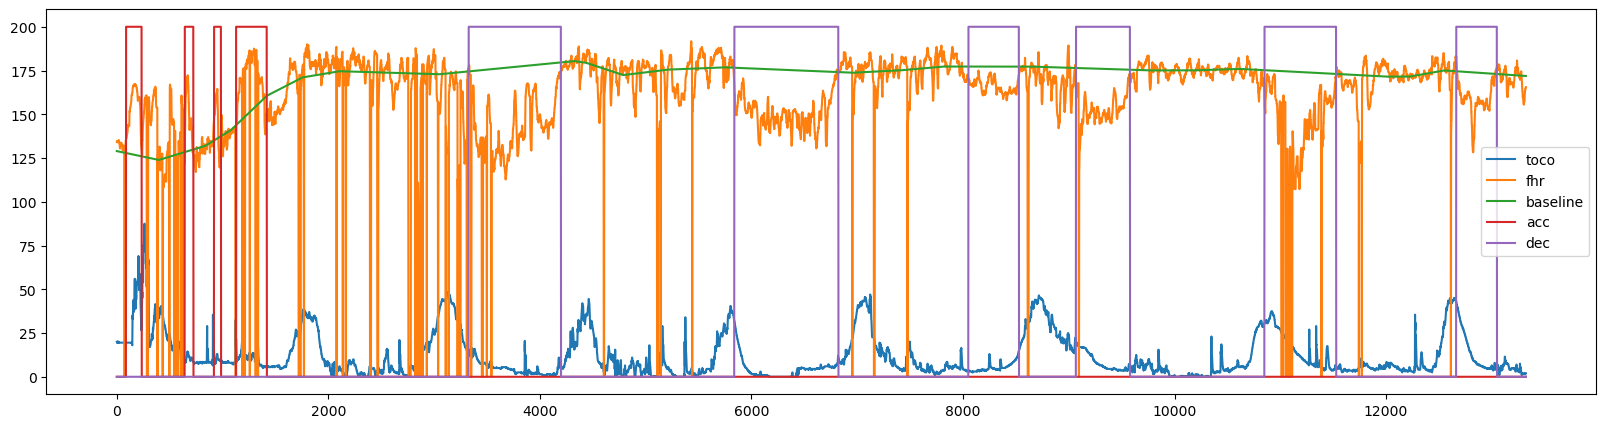

In [89]:
dd.plot(figsize=(20,5))

In [91]:
df_info = pd.DataFrame(info_list)
df_info.to_csv('df_FHRMA_expert_annotation_for_train_data.csv', index=False)

In [92]:

df_info.tail()

,pid,fname,record_index,baseline_length,n_dec,n_acc,dec_s0,dec_e0,dec_s1,dec_e1,...,acc_s36,acc_e36,acc_s37,acc_e37,acc_s38,acc_e38,acc_s39,acc_e39,acc_s40,acc_e40
61,train62,train62.fhr,151,43767,0,25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,train63,train63.fhr,152,15383,1,19,48.670833,49.237500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,train64,train64.fhr,153,15836,0,19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,train65,train65.fhr,154,28767,3,41,54.862349,56.000944,78.998301,79.576095,...,110.690144,111.573829,114.717711,115.278512,115.414464,116.145204,118.116503,118.932213,119.39105,119.747923
65,train66,train66.fhr,155,13324,6,4,13.858573,17.495279,24.326850,28.422394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df_info[df_info.columns[:30]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              66 non-null     object 
 1   fname            66 non-null     object 
 2   record_index     66 non-null     int64  
 3   baseline_length  66 non-null     int64  
 4   n_dec            66 non-null     int64  
 5   n_acc            66 non-null     int64  
 6   dec_s0           61 non-null     float64
 7   dec_e0           61 non-null     float64
 8   dec_s1           57 non-null     float64
 9   dec_e1           57 non-null     float64
 10  dec_s2           56 non-null     float64
 11  dec_e2           56 non-null     float64
 12  dec_s3           50 non-null     float64
 13  dec_e3           50 non-null     float64
 14  dec_s4           47 non-null     float64
 15  dec_e4           47 non-null     float64
 16  dec_s5           43 non-null     float64
 17  dec_e5           4

<Axes: >

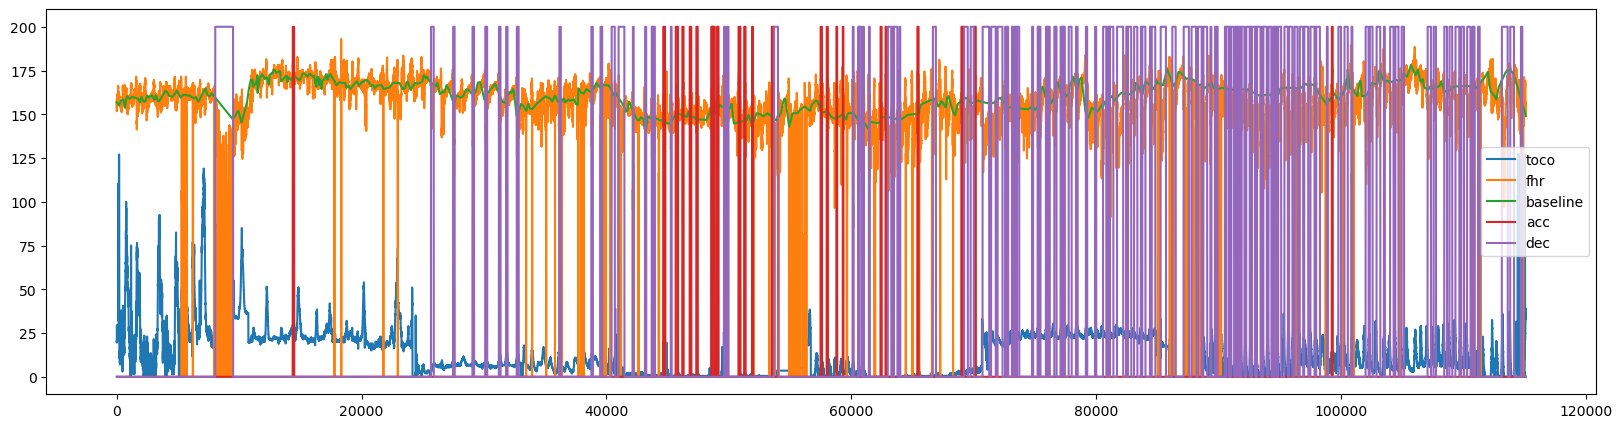

In [109]:
df = pd.read_csv(os.path.join('train_csv','train43.csv'))
df.plot(figsize=(20,5))

<Axes: >

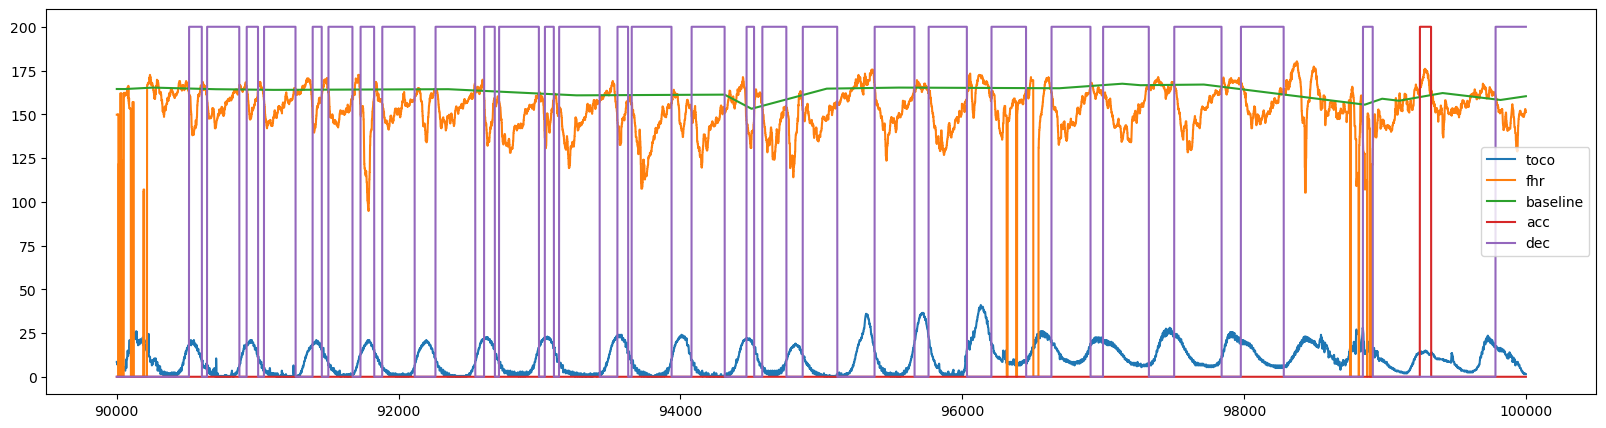

In [110]:
df.iloc[90000:100000].plot(figsize=(20,5))

# Visualize Annotations

In [94]:
dynamic_df[dynamic_df.test==0].head()

,pid,test,file_name,sig_length,fhr_mean,toco_mean
0,train01.csv,0,train01.fhr,14006,148.906112,33.752463
1,train02.csv,0,train02.fhr,16148,148.033936,17.714454
2,train03.csv,0,train03.fhr,9746,160.565360,34.688385
3,train04.csv,0,train04.fhr,17594,141.324145,39.549591
4,train05.csv,0,train05.fhr,17459,140.434919,33.603156


In [95]:
df_info[df_info.pid=='train04']

,pid,fname,record_index,baseline_length,n_dec,n_acc,dec_s0,dec_e0,dec_s1,dec_e1,...,acc_s36,acc_e36,acc_s37,acc_e37,acc_s38,acc_e38,acc_s39,acc_e39,acc_s40,acc_e40
3,train04,train04.fhr,93,17595,1,17,56.90181,57.474866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df_info[df_info.fname=='train04.fhr']

,pid,fname,record_index,baseline_length,n_dec,n_acc,dec_s0,dec_e0,dec_s1,dec_e1,...,acc_s36,acc_e36,acc_s37,acc_e37,acc_s38,acc_e38,acc_s39,acc_e39,acc_s40,acc_e40
3,train04,train04.fhr,93,17595,1,17,56.90181,57.474866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df_bl = pd.read_csv(os.path.join('train_csv','train04.csv'))[['baseline']]
df_bl.head()

,baseline
0,136.222678
1,136.224827
2,136.226975
3,136.229124
4,136.231273


In [100]:
df_info.head()

,pid,fname,record_index,baseline_length,n_dec,n_acc,dec_s0,dec_e0,dec_s1,dec_e1,...,acc_s36,acc_e36,acc_s37,acc_e37,acc_s38,acc_e38,acc_s39,acc_e39,acc_s40,acc_e40
0,train01,train01.fhr,90,14007,23,0,2.353663,3.050415,4.002077,6.432213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,train02,train02.fhr,91,16149,6,0,10.969600,12.159177,19.534554,20.435234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,train03,train03.fhr,92,9747,3,5,14.884383,15.336796,18.473525,19.287869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,train04,train04.fhr,93,17595,1,17,56.901810,57.474866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,train05,train05.fhr,94,17460,19,3,15.965823,17.427304,18.236216,18.627077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# Lists to store values
acc_values = []
dec_values = []

# Loop through columns and extract values based on column names
for col in df_info.columns:
    if 'acc' in col and col!='n_acc':
        acc_values.append(df_info[df_info.fname=='train04.fhr'][col].values[0])
    elif 'dec' in col and col!='n_dec':

        dec_values.append(df_info[df_info.fname=='train04.fhr'][col].values[0])

acc_values= [x for x in acc_values if not pd.isna(x)]
dec_values= [x for x in dec_values if not pd.isna(x)]

In [102]:
acc_values[0]

4.375944108761331

[(56.90180965147453, 57.47486595174263)]
[(4.375944108761331, 5.310611782477343), (22.032666163142004, 23.56212235649548), (24.054947129909376, 25.074584592145026), (25.567409365558923, 26.24716767371602), (27.878587613293064, 30.07080815709971), (30.376699395770405, 31.039463746223575), (31.324962235649547, 32.76944864048339), (32.95638217522659, 34.80872356495468), (38.258496978851966, 40.56967522658611), (41.198451661631424, 41.98017371601209), (43.63878398791541, 43.99565709969789), (46.092711480362546, 48.18296827794563), (48.386895770392755, 48.74376888217523), (50.969977341389736, 52.958270392749256), (53.17919184290031, 53.51907099697886), (53.63123111782478, 53.9541163141994), (66.89407099697885, 67.38689577039275)]


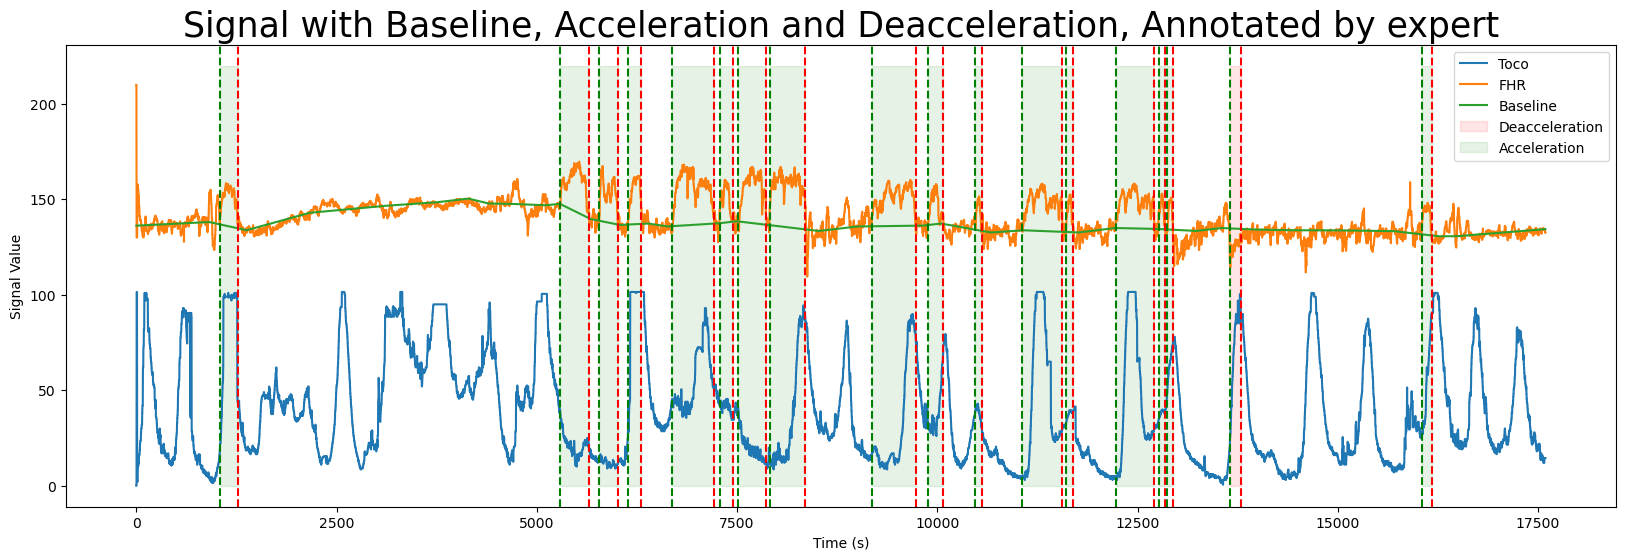

In [104]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(os.path.join('train_csv','train04.csv'))
df_bl = pd.read_csv(os.path.join('train_csv','train04.csv'))[['baseline']]

# Convert minutes to indices
indices_intervals = dec_to_ind([(dec_values[i], dec_values[i+1]) for i in range(0, len(dec_values), 2)])

# Plot the signal
plt.figure(figsize=(20, 6))
plt.plot(df['toco'], label='Toco')
plt.plot(df['fhr'], label='FHR')
plt.plot(df_bl.values,  label='Baseline')

add_leg=0
# Fill the vertical area between start and end points
for start_idx, end_idx in indices_intervals:
    plt.axvline(x=start_idx, color='g', linestyle='--');
    plt.axvline(x=end_idx, color='r', linestyle='--');
    if add_leg==0:
        plt.fill_betweenx([0,220], start_idx, end_idx, color='red', alpha=0.1,
                          label='Deacceleration')
        add_leg=1
    else:
        plt.fill_betweenx([0,220], start_idx, end_idx, color='red', alpha=0.1)

indices_intervals = dec_to_ind([(acc_values[i], acc_values[i+1]) for i in range(0, len(acc_values), 2)])

# Fill the vertical area between start and end points
add_leg=0
for start_idx, end_idx in indices_intervals:
    plt.axvline(x=start_idx, color='g', linestyle='--')
    plt.axvline(x=end_idx, color='r', linestyle='--')
    if add_leg==0:
        plt.fill_betweenx([0,220], start_idx, end_idx, color='green', alpha=0.1,
                          label='Acceleration')
        add_leg=1
    else:
        plt.fill_betweenx([0,220], start_idx, end_idx, color='green', alpha=0.1)
    #plt.fill_betweenx([0,220], start_idx, end_idx, color='green', alpha=0.1)

plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.title('Signal with Baseline, Acceleration and Deacceleration, Annotated by expert', fontsize=25)

plt.legend()
plt.show()


In [ ]:
from google.colab import files
#files.download('df_FHRMA_expert_annotation_for_train_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#files.download('df_FHRMA_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Original code to understand data structure
```
import scipy.io
import pandas as pd
import numpy as np

# Load the .mat file
#mat = scipy.io.loadmat('your_file.mat')

# Display the keys in the .mat file
print(mat.keys())

# Access the specific variable (assuming 'data' is a key in the .mat file)
data = mat['data']

# Extract and organize the data into a DataFrame
records = []
for record in data:
    filename = record[0][0]
    expertPts = record[1]
    trainingData = record[2]
    baseline = record[3]
    accelerations = record[4]
    decelerations = record[5]
    overshoots = record[6]
    unreliableSignal = record[7]
    notToAnalyse = record[8]
    records.append({
        'filename': filename,
        'expertPts': expertPts,
        'trainingData': trainingData,
        'baseline': baseline,
        'accelerations': accelerations,
        'decelerations': decelerations,
        'overshoots': overshoots,
        'unreliableSignal': unreliableSignal,
        'notToAnalyse': notToAnalyse
    })

df = pd.DataFrame(records)

# Display the first few rows of the DataFrame
df.head()
```